### Numerical Methods Project By:
## Peter Struschka(5780590) & Phornthep Sachdev(5680836)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy.misc
import scipy.ndimage

### For scipy.misc to work : need to install pillow
#### $ pip install pillow

The first method is a naive method called nearest neighbor interpolation and here is the function for upscaling.     
#### To run [Example]: nearest_nbr_up("mario.png",4,"newmario.png")
#### Takes scale input as int.
#### Make sure the images are in the same directory as this ipynb notebook.

In [10]:
def nearest_nbr_up(img,scale,new_name):
	Img = plt.imread(img)
	dim = Img.shape
	n_col, n_row = dim[0],dim[1]
	x = dim[0]*scale
	y = dim[1]*scale
	z = dim[2]
	x_ratio = n_col/float(x)
	y_ratio = n_row/float(y)
	scaled = np.empty([x,y,z])

	for row in range(y):
		for col in range(x):
			p_row = int(math.floor(row*y_ratio))
			p_col = int(math.floor(col*x_ratio))
			scaled[col,row] = Img[p_col,p_row]
	scipy.misc.imsave(new_name, scaled)
	return "Done Nearest Neighbor Inter. -> Check directory for scaled Image"

# print nearest_nbr_up("mario.png",4,"pixelatedmario.png")

This second method is much better at smoothening the edges because we interpolate between the points to put the perfect blend of colors between the whitespaces when upscaling. This also works for downscaling.

Bilinear Interpolation works by looking at a pixel's relative position in the original image and comparing it to nearby pixels in the original image to find the color

#### Takes scale input as int or float

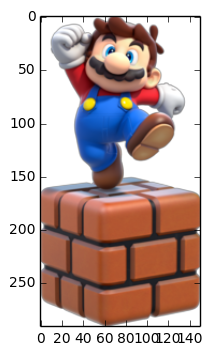

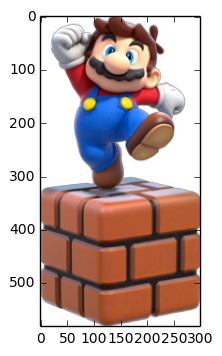

In [6]:
def bilinearInterpolation(image, scale,new_name):
    Img = plt.imread(image)
    dim = Img.shape
    y = dim[0]
    x = dim[1]
    z = dim[2]
    scaled = np.zeros([int(y*scale),int(x*scale),z])
    xn = len(scaled[0])
    yn = len(scaled)
    #print scaled
    for row in range(yn):
        for col in range(xn):
            y0 = row
            x0 = col
            x00 = x0/scale
            x1 = int(math.floor(x00))
            # Check the bound of new pixel relative to the original image#
            if x1+1 < x: #If inbound
                x2 = x1+1
            else: #If out of bound
                x1 -= 1
                x2 = x1+1
            y00 = y0/scale
            y1 = int(math.floor(y00))
            if y1+1 < y:
                y2 = y1+1
            else:
                y1 -= 1
                y2 = y1+1
                
            #Interpolate in x-direction
            fx_y1 = (((x2-x00)/(x2-x1))*Img[y1,x1])+(((x00-x1)/(x2-x1))*Img[y1,x2])
            fx_y2 = (((x2-x00)/(x2-x1))*Img[y2,x1])+(((x00-x1)/(x2-x1))*Img[y2,x2])
            #Interpolate in y-direction
            fx_y = (((y2-y00)/(y2-y1))*fx_y1)+(((y00-y1)/(y2-y1))*fx_y2)
            scaled[row,col] = fx_y
    scipy.misc.imsave(new_name, scaled)
    newimg = plt.imread(new_name)
    plt.imshow(Img)
    plt.figure()
    plt.imshow(newimg)
    scipy.misc.imsave(new_name, scaled)
    return

bilinearInterpolation("mario.png",2,"smoothedgemario.png")

Scale width and height independently.

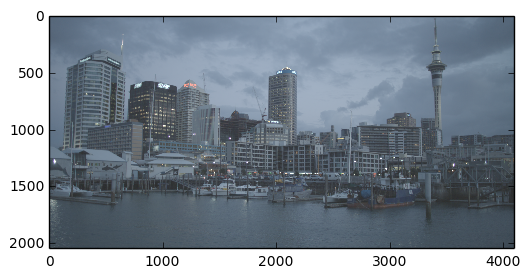

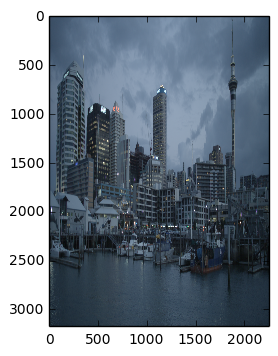

In [7]:
def bilinearInterpolation2(image, scalex, scaley, new_name):
    Img = plt.imread(image)
    dim = Img.shape
    y = dim[0]
    x = dim[1]
    z = dim[2]
    scaled = np.zeros([int(y*scaley),int(x*scalex),z])
    xn = len(scaled[0])
    yn = len(scaled)
    #print scaled
    for row in range(yn):
        for col in range(xn):
            y0 = row
            x0 = col
            x00 = x0/scalex
            x1 = int(math.floor(x00))
            # Check the bound of new pixel relative to the original image#
            if x1+1 < x: #If inbound
                x2 = x1+1
            else: #If out of bound
                x1 -= 1
                x2 = x1+1
            y00 = y0/scaley
            y1 = int(math.floor(y00))
            if y1+1 < y:
                y2 = y1+1
            else:
                y1 -= 1
                y2 = y1+1
                
            #Interpolate in x-direction
            fx_y1 = (((x2-x00)/(x2-x1))*Img[y1,x1])+(((x00-x1)/(x2-x1))*Img[y1,x2])
            fx_y2 = (((x2-x00)/(x2-x1))*Img[y2,x1])+(((x00-x1)/(x2-x1))*Img[y2,x2])
            #Interpolate in y-direction
            fx_y = (((y2-y00)/(y2-y1))*fx_y1)+(((y00-y1)/(y2-y1))*fx_y2)
            scaled[row,col] = fx_y
    scipy.misc.imsave(new_name, scaled)
    newimg = plt.imread(new_name)
    plt.imshow(Img)
    plt.figure()
    plt.imshow(newimg)
    return
bilinearInterpolation2("city.png", 0.55, 1.55, "city1.png")